In [26]:
import legacy
import torch
import numpy as np
import random
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
device = torch.device('cuda')
device

device(type='cuda')

In [51]:
models = legacy.load_network_pkl(open('./pretrained_model/ffhq.pkl', 'rb'))
models.keys()

dict_keys(['G', 'D', 'G_ema', 'training_set_kwargs', 'augment_pipe'])

In [52]:
G = models['G_ema'].to(device)
count = 0
for p in G.parameters():
    count += p.numel()
print(f"G has {count} params")

G has 30370060 params


In [53]:
label = torch.zeros([1, G.c_dim], device=device)
label

tensor([], device='cuda:0', size=(1, 0))

latent code: torch.Size([1, 512]) torch.float64


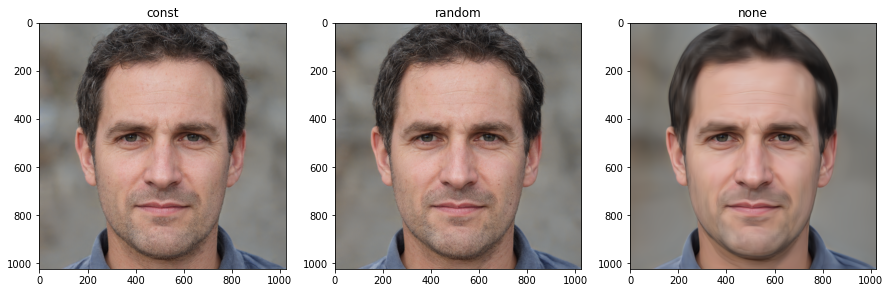

In [60]:
noise_modes = ['const', 'random', 'none']
seed = 1
truncation_psi = 0.4
z = torch.from_numpy(np.random.RandomState(seed).randn(1, G.z_dim)).to(device)
print("latent code:", z.shape, z.dtype)

fig = plt.figure(figsize=(15,15))
for i, noise_mode in enumerate(noise_modes):
    img = G(z, label, truncation_psi=truncation_psi, noise_mode=noise_mode)
    img = (img.permute(0, 2, 3, 1) * 127.5 + 128).clip(0, 255).to(torch.uint8)
    img = Image.fromarray(img[0].cpu().numpy(), 'RGB')
    plt.subplot(1, len(noise_modes), i+1)
    plt.imshow(img)
    plt.title(noise_mode)